#Load and Inspect the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Dataset Information
https://www.kaggle.com/datasets/dhoogla/unswnb15/data

In [ ]:
import pandas as pd

# Load the dataset
url = "/content/gdrive/MyDrive/UPB/2023-2024 Genap/B Penelitian/Brute Force Mitigation/UNSW_NB15_training-set.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Check data types of each column
print(data.dtypes)


   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

#Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_features = ['proto', 'service', 'state']
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

# Ensure no other categorical data exists
print(data.dtypes)


id                     int64
dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

#Check for and Handle Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.dropna()  # Alternatively, you can fill missing values with data.fillna(method='ffill') or other appropriate method


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

#Split Data into Features and Target Variable

In [ ]:
# Split the data into features and target variable
X = data.drop(['label', 'attack_cat'], axis=1)  # Drop 'label' and any other non-numeric columns if they exist
y = data['label']

# Double-check the data types of X to ensure all are numeric
print(X.dtypes)


id                     int64
dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

#Standardize the Feature Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


#Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train the Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#Predict and Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9886794604921726
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     11169
           1       0.99      1.00      0.99     23900

    accuracy                           0.99     35069
   macro avg       0.99      0.98      0.99     35069
weighted avg       0.99      0.99      0.99     35069

Confusion Matrix:
 [[10827   342]
 [   55 23845]]


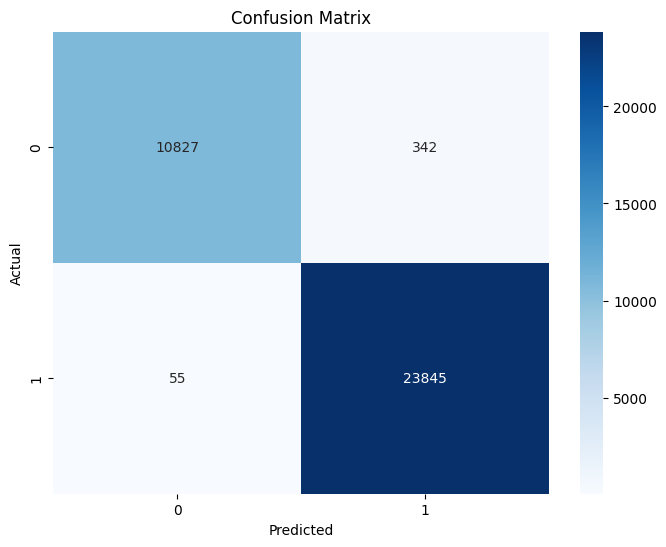

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)

# Predict and Evaluate the Model (same as before)
# ...

# Create a blue confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
